# ============================================
# HOUSE PRICE PREDICTION — Full Project
# by Tannu
# ID: cxiai202511230
# Dataset: fetch_california_housing (scikit-learn)
# ===============================================

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score


# ------------------------------------------------------------
# 1. Load Dataset
# -------------------------------------------------------------


In [51]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
Y = pd.Series(data.target, name="Price")

df = pd.concat([X, Y], axis=1)
print("Dataset shape:", df.shape)
df

Dataset shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# ------------------------------------------------------------
# 2. Exploratory Data Analysis (EDA)
# ------------------------------------------------------------


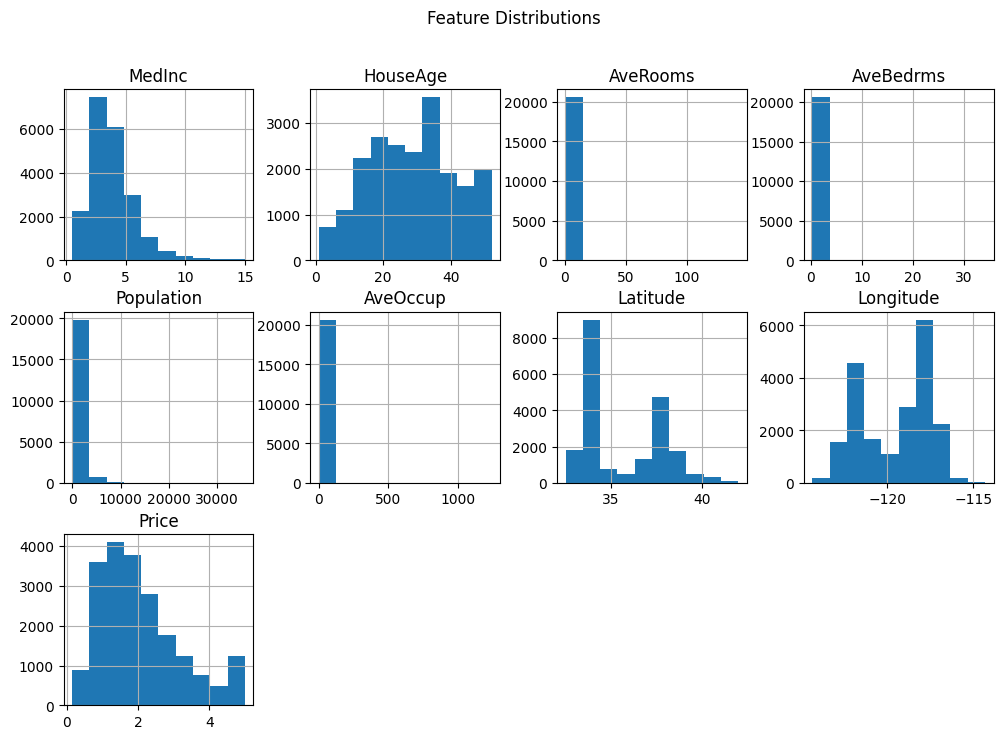

In [4]:
df.hist(layout=(3,4),figsize=(12,8))
plt.suptitle("Feature Distributions")
plt.show()

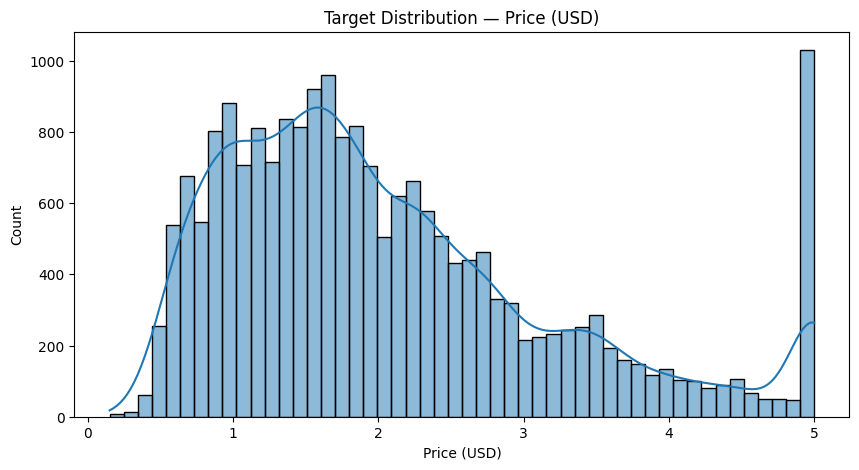

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(df['Price'], kde=True, bins=50)
plt.title("Target Distribution — Price (USD)")
plt.xlabel("Price (USD)")
plt.show()

<Axes: >

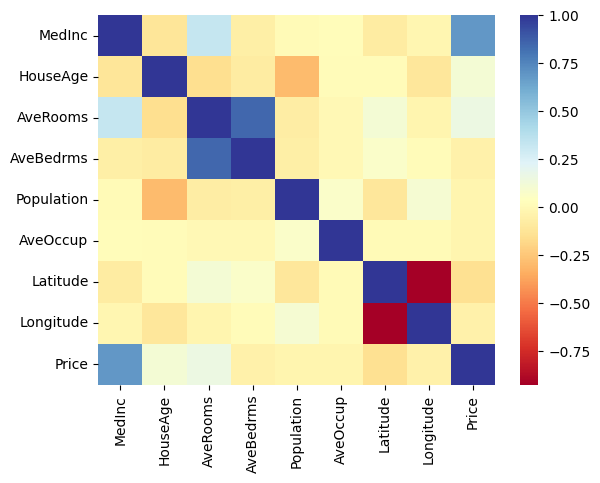

In [5]:
sns.heatmap(df.corr(), cmap='RdYlBu')

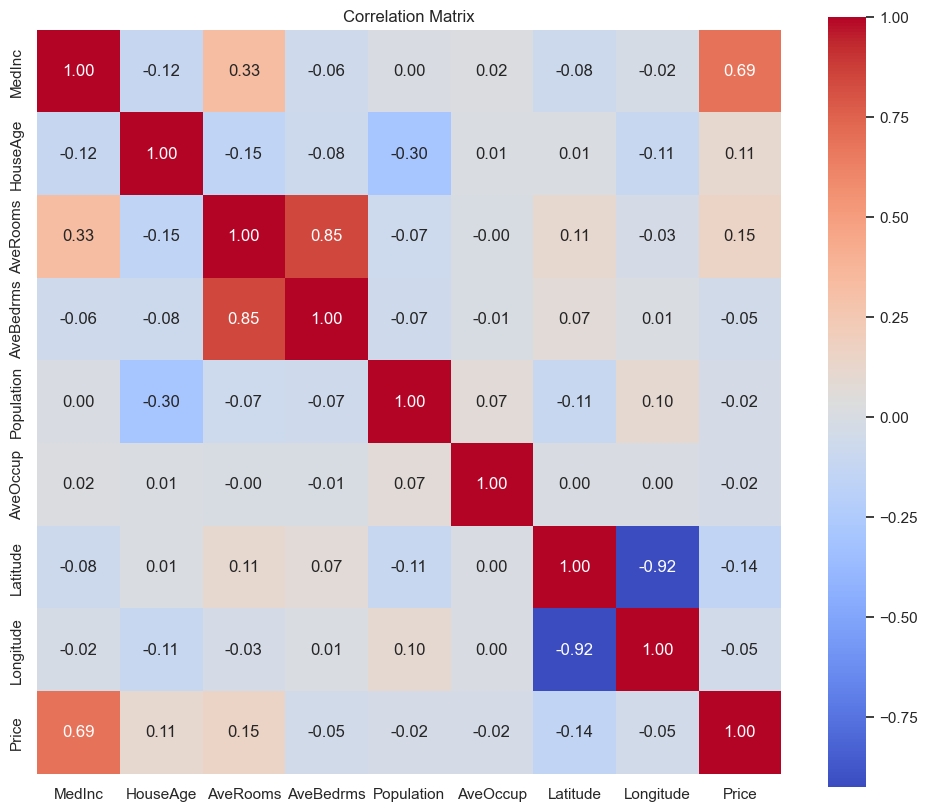

In [37]:

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

# ------------------------------------------------------------
# 3. Pre-processing Scaling
# ------------------------------------------------------------


In [7]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [30]:
df.dropna()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


- ## Determining Outliers

<Axes: >

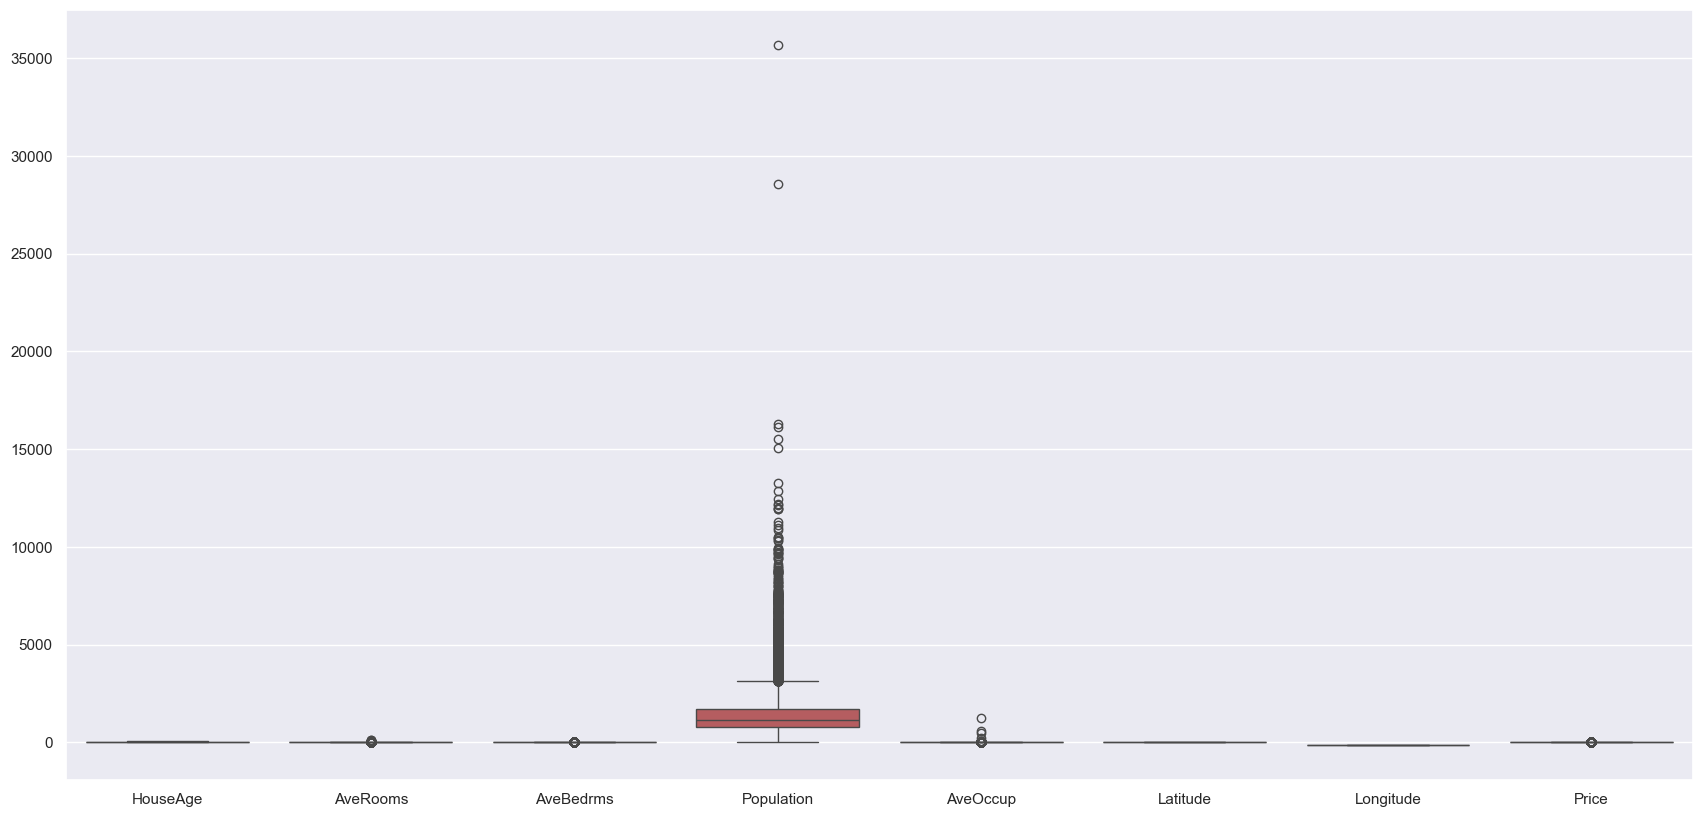

In [38]:
sns.set(rc={'figure.figsize':(21,10)})
sns.boxplot(data=df.iloc[:,1:])

In [34]:
scaler = StandardScaler()
XScaled = scaler.fit_transform(X)

- ## Splitting using hold out method


In [35]:
X_train, X_test,Y_train, Y_test = train_test_split(XScaled,Y,random_state=51,test_size=0.20,shuffle=True)

# ----------------------------
# 4. DEFINE MODEL
# ----------------------------

In [8]:
model= LinearRegression()

# -----------------------------------
# 5. EVALUATE MODEL
# -------------------------------------

In [37]:
model.fit(X_train, Y_train)
Y_Pred = model.predict(X_test)

In [18]:
compare = pd.DataFrame({'Actual': Y_test, 'Prediction': Y_Pred})
print("\nActual vs Prediction:\n",compare)


Actual vs Prediction:
         Actual  Prediction
6428   1.39200    1.533069
8714   3.49300    3.259302
15034  2.22800    2.631900
14083  3.00000    2.500538
6538   1.37500    1.792691
...        ...         ...
13490  1.12300    1.387225
20067  1.21200    0.869192
15039  2.41400    2.745167
8788   5.00001    4.064034
10590  2.38900    2.431700

[4128 rows x 2 columns]


# -----------------------------------------------------
# 6. Summary Table
# -------------------------------------------------------

In [43]:
mse = mean_squared_error(Y_test, Y_Pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_Pred)
eval_table = pd.DataFrame({
    "model": ["Linear Regression"],
    "mse": [mse],
    "rmse": [rmse],
    "r2": [r2]
})

print("\nMODEL EVALUATION TABLE:\n")
eval_table


MODEL EVALUATION TABLE:



,model,mse,rmse,r2
0,Linear Regression,0.518039,0.719749,0.617332


# -----------------------------------------------------
# 7. Plot Graph – Actual vs Predicted
# -------------------------------------------------------

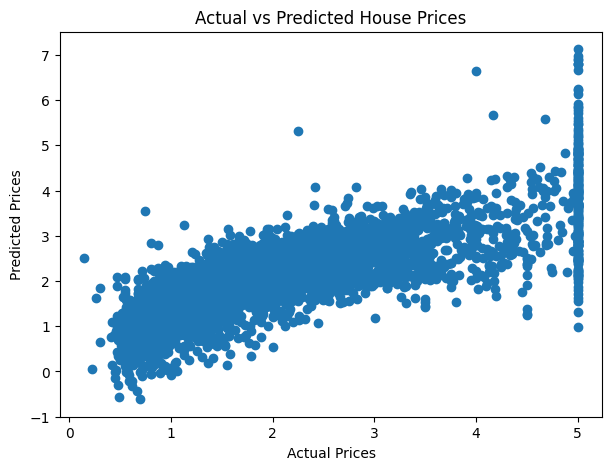

In [45]:
plt.figure(figsize=(7,5))
plt.scatter(Y_test, Y_Pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()